In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [9]:
# Read in data for sentiment analysis
path = r'C:/Users/Chris/OneDrive/Desktop/Data/Lazada Reviews' 
df = pd.read_csv(path + '//Lazada_Reviews.csv')
print(df)

        Unnamed: 0                                        review_text  \
0                0  This app is a big step in right direction - gr...   
1                1  This is what I have been looking for. Now I ca...   
2                2  Its a great way of shopping online. But please...   
3                3                       Thanks lazada for this app!!   
4                4                                        Good app ;)   
...            ...                                                ...   
775318      775318                                               nice   
775319      775319                                               Nice   
775320      775320                                 thanks super sulit   
775321      775321  1 of the best online shopping app because of t...   
775322      775322                                               Good   

        review_rating              author_id    author_name  \
0                   5  109329*********902682  A Google user 

In [10]:
# Fix data types
print('Before change', df.dtypes)
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], format = '%Y-%m-%dT%H:%M:%S.000Z')
print('\nAfter change', df.dtypes)

Before change Unnamed: 0              int64
review_text            object
review_rating           int64
author_id              object
author_name            object
author_app_version     object
review_datetime_utc    object
review_likes            int64
dtype: object

After change Unnamed: 0                      int64
review_text                    object
review_rating                   int64
author_id                      object
author_name                    object
author_app_version             object
review_datetime_utc    datetime64[ns]
review_likes                    int64
dtype: object


In [11]:
# Rename columns for readability
df = df.rename(columns = {'Unnamed: 0' : 'id', 'review_datetime_utc' : 'review_datetime'})
df.head(5)

,id,review_text,review_rating,author_id,author_name,author_app_version,review_datetime,review_likes
0,0,This app is a big step in right direction - gr...,5,109329*********902682,A Google user,1.0,2013-06-09 08:34:37,2
1,1,This is what I have been looking for. Now I ca...,5,109886*********190000,A Google user,1.0,2013-06-09 09:29:25,0
2,2,Its a great way of shopping online. But please...,1,114358*********899063,A Google user,1.0,2013-06-09 10:19:39,0
3,3,Thanks lazada for this app!!,5,108006*********600292,A Google user,1.0,2013-06-10 02:24:14,0
4,4,Good app ;),5,110676*********237626,A Google user,1.0,2013-06-10 02:35:53,0


In [12]:
# Drop unnecessary columns for the sentiment analysis
df = df.drop(columns = ['author_id'])
df.shape

(775323, 7)

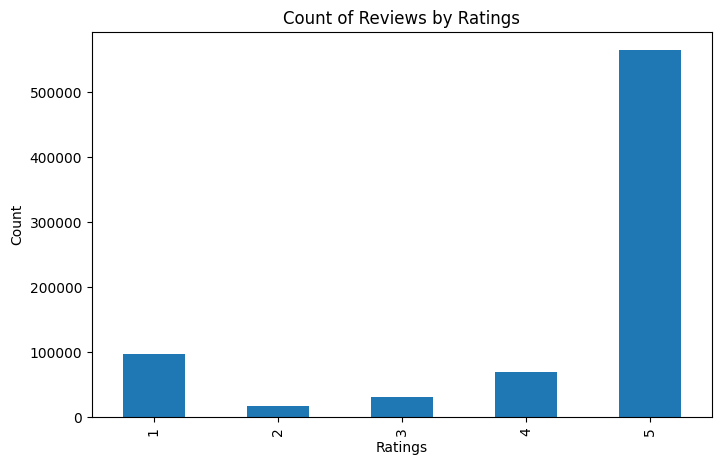

In [32]:
# Simple EDA to understand our general sentiment by ratings
ax = df['review_rating'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title = 'Count of Reviews by Ratings',
          figsize = (8,5))
ax.set_xlabel('Ratings')
ax.set_ylabel('Count')
plt.show() # Dataset strongly skewed towards positive reviews